## Check the Cu K$\alpha$, Fe Cu K$\alpha$ and Mn Cu K$\alpha$ line fitting results after applying the long-term CTI correction

Current run is with `EPN_CTI_0053.CCF and EPN_CTI_0054.CCF`, prepared by Michael Smith based on my `EPN_CTI_0054.CCF_gauss`.

### Modification history

* Created __Ivan Valtchanov, 04 Mar 2020__
* 19 Mar 2020: adapted to work from the MacBookPro (fit results in Dropbox folder)


In [1]:
#
# necessary import packages
#
import os
import numpy as np
import glob
#import altair as alt
import pandas as pd

from astropy.table import Table, Column, vstack
from astropy.io import fits
#from scipy.interpolate import UnivariateSpline
home = os.path.expanduser('~')

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="white")

plt.rc('text', usetex=False)
plt.rc('font', family='serif')

In [2]:
wdir = f"{home}/Dropbox/Work/XMM/energy_scale_works/results"
#
# fit results with the testing CCF prepared by Michael Smith: EPN_CTI_0054.CCF & EPN_CTI_0053.CCF
#
vers = 'cti53'
t1 = Table.read(f'{wdir}/fit_results_cuka_{vers}_Mar2020.csv',comment="\s*#")
t1["ratioE"] = Column(t1["lineE"]/8.04)
t1["ratioE_err"] = Column(t1["lineE_err"]/8.04)
t1["diffE"] = Column(t1["lineE"] - 8.04)
t1["diffE_err"] = Column(t1["lineE_err"])
tab1 = t1.to_pandas()

In [3]:
#
# CCD position in plot
#
mapping = {1: [0,2], 2: [0,1], 3: [0,0], 4: [0,3], 5: [0,4], 6: [0,5],
          7: [1,3], 8: [1,4], 9: [1,5], 10: [1,2], 11: [1,1], 12: [1,0]}

## Per CCD results

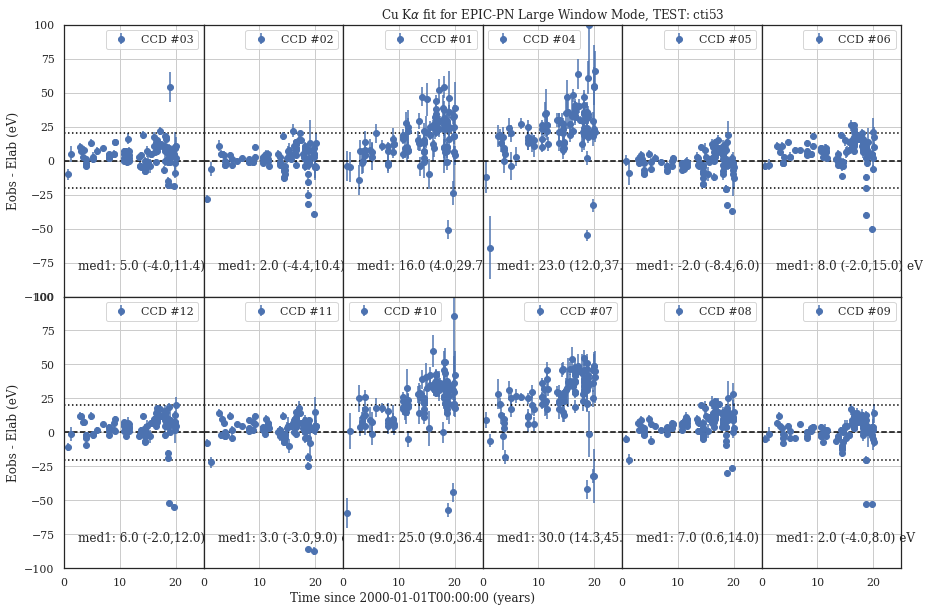

In [4]:
fig, axs = plt.subplots(2,6,sharex=True,sharey=True,figsize=(15,10))
stab1 = tab1.sort_values(['delta_time'])
#
vers = 'cti53'
for j in range(12):
    ccd = j+1
    xtab1 = stab1[stab1.ccd == ccd]
    #
    xin1 = xtab1.delta_time
    yin1 = xtab1.diffE*1000.0 # in eV
    yin1_err = xtab1.diffE_err*1000.0 # in eV
    med1, low1, up1 = np.quantile(yin1,[0.5,0.16,0.84])
    #
    kj = mapping[ccd][0]
    k = mapping[ccd][1]
    axs[kj,k].errorbar(xin1,yin1,yerr=(yin1_err,yin1_err),fmt='o',label=f'CCD #{ccd:02}')
    axs[kj,k].axhline(0.0,color='black',ls='dashed')
    axs[kj,k].axhline(-20.0,color='black',ls='dotted')
    axs[kj,k].axhline(20.0,color='black',ls='dotted')
    #
    axs[kj,k].text(0.1,0.1,f'med1: {med1:.1f} ({low1:.1f},{up1:.1f}) eV',transform=axs[kj,k].transAxes)
    #
    axs[kj,k].set_xlim((0,25))
    axs[kj,k].set_ylim((-100.0,100.0))
    axs[kj,k].grid(True)
    axs[kj,k].legend()
    if (ccd == 4):
        axs[kj,k].set_title(fr"Cu K$\alpha$ fit for EPIC-PN Large Window Mode, TEST: {vers}")
    if (ccd == 3 or ccd == 12):
        axs[kj,k].set_ylabel("Eobs - Elab (eV)")
    if (ccd == 10):
        #axs[kj,k].set_xlabel("Revolution")
        axs[kj,k].set_xlabel("Time since 2000-01-01T00:00:00 (years)")
#
plt.subplots_adjust(wspace=0, hspace=0)
#plt.text(-13,-1,'Energy (keV)',ha='center', va='center')
#plt.text(-36,10,'Counts',rotation='vertical',ha='center', va='center')
#plt.tight_layout()
#plt.savefig(f"{wdir}/plots/cuka_results53_perCCD.png",dpi=100)
#plt.show();
#plt.close();

## Per quadrant results

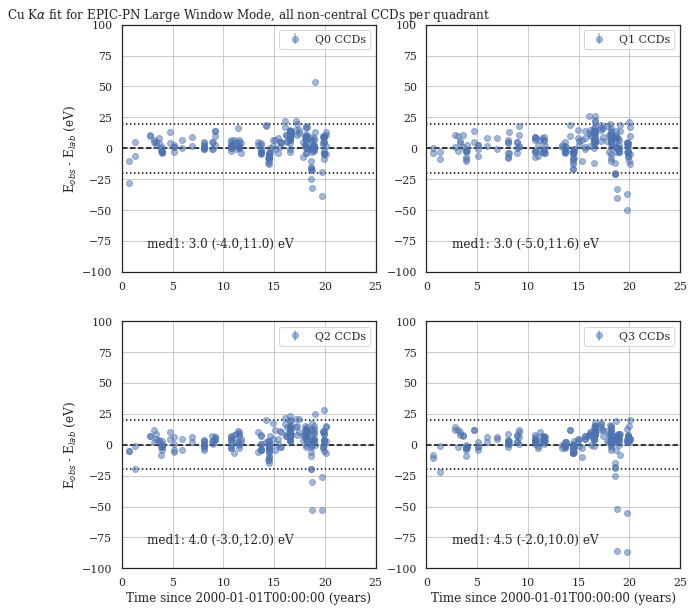

In [5]:
#
fig3 = plt.figure(figsize=(10,10))

stab = tab1.sort_values(['delta_time'])

qtab = {}
qtab['q0'] = stab[(stab.ccd == 2) | (stab.ccd == 3)]
qtab['q1'] = stab[(stab.ccd == 5) | (stab.ccd == 6)]
qtab['q2'] = stab[(stab.ccd == 8) | (stab.ccd == 9)]
qtab['q3'] = stab[(stab.ccd == 11) | (stab.ccd == 12)]
#
ccds = {'q0': [1,2,3], 'q1': [4,5,6], 'q2': [7,8,9], 'q3': [10,11,12]}
#
#
for i,iq in enumerate(['q0','q1','q2','q3']):
    # pick up non-central CCD for the CCF curve
    ccd = ccds[iq][-1]
    #
    xin = qtab[iq].delta_time
    yin = (qtab[iq].ratioE - 1.0)*8040.0
    yin_err = qtab[iq].ratioE_err
    #
    med1, low1, up1 = np.quantile(yin,[0.5,0.16,0.84])
    ax3 = fig3.add_subplot(2, 2, i+1)
    ax3.errorbar(xin,yin,yerr=yin_err,fmt='o',label=f'{iq.upper()} CCDs',alpha=0.5)
    ax3.grid()
    if (i in [0,2]): 
        ax3.set_ylabel(r"E$_{obs}$ - E$_{lab}$ (eV)")
    if (i in [2,3]): 
        ax3.set_xlabel("Time since 2000-01-01T00:00:00 (years)")
    ax3.legend();
    if (i == 0):
        ax3.set_title(fr"Cu K$\alpha$ fit for EPIC-PN Large Window Mode, all non-central CCDs per quadrant")
    ax3.axhline(0.0,color='black',ls='dashed')
    ax3.axhline(-20.0,color='black',ls='dotted')
    ax3.axhline(20.0,color='black',ls='dotted')
    #
    ax3.text(0.1,0.1,f'med1: {med1:.1f} ({low1:.1f},{up1:.1f}) eV',transform=ax3.transAxes)
    #
    ax3.set_xlim((0,25))
    ax3.set_ylim((-100.0,100.0))
#plt.savefig(f"{wdir}/plots/cuka_results_cti53_per_quadrant.png",dpi=100)
#plt.show();
#plt.close();

## Check the Fe K$\alpha$ results with the new CCF


In [9]:
#
# define the targets and their redshift
#
targets = ["ngc3227","mkn1040","mkn915","ngc6814",'mkn883','tycho', 'ngc5899','ngc526a','kepler']
#
colors = {"ngc3227":'red',"mkn1040":'green',"mkn915":'blue',"ngc6814":'magenta','mkn883':'cyan','tycho': 'gray',
         'ngc5899': 'lime', 'ngc526a': 'orange', 'kepler': 'brown', "snr1987a": "pink"}
#
# redshifts
#
redshift = {'ngc4151': 0.003262, 'ngc3227': 0.00386, 'mrk1048': 0.0427, 'ngc3783': 0.009755,\
            'ngc4593': 0.008344, 'ngc5506': 0.00589, 'mcg-5-23-16': 0.008226, 'ngc3516': 0.008816,\
            'ngc5548': 0.01627, 'ngc2992':  0.007296, 'ngc1566': 0.005036, 'iras09149': 0.057150,\
            "iras05078": 0.017879, 'ngc7213': 0.005869,"mkn915": 0.024043,"mkn1040":0.016338,\
            "ngc6814": 0.005227, 'mkn883': 0.03787, 'tycho': 0.0, 'ngc5899': 0.00880, 'ngc526a': 0.01897,
           "kepler": 0.0, "snr1987a": 0.0}
feK = 6.399 # the weighted mean of Fe Kalpha_2 at 6.3908 (intensity 50) and Fe Kalpha_1 at 6.40308 (intensity 100)

Adding ngc3227
Adding mkn1040
Adding mkn915
Adding ngc6814
Adding mkn883
Adding tycho
Adding ngc5899
Adding ngc526a
Adding kepler


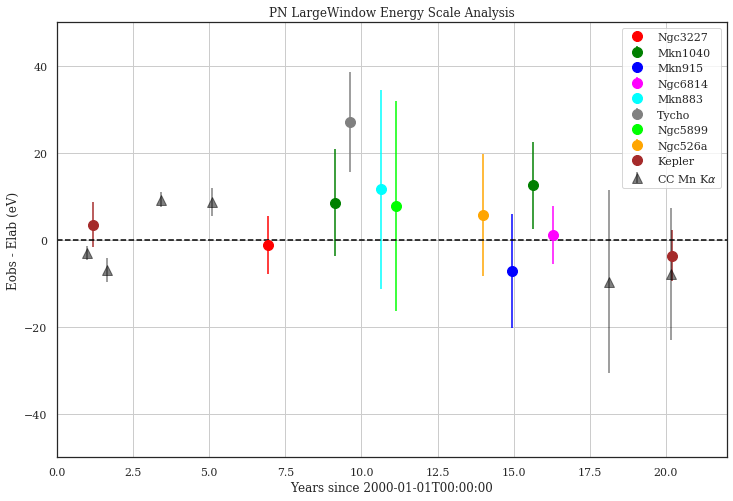

In [15]:
#
# calculate the differences and plot
# save some info in a tex table
#
xratio64 = []
xratio64err = []
xrtime = []

msize=10
xcols = {}
fig, ax = plt.subplots(figsize=(12,8))

#
# testing EPN_CTI_0053/0054 from Michael Smith
#
vers = "cti53"

k = 0
symb = 'o'

#srcdir = f"{home}/IVAN/PN_LW/sources"
srcdir = wdir

for target in targets:
    print (f"Adding {target}")
    #
    lineX =  feK/(1.0 + redshift[target]) # redshifted line position
    if (target == 'snr1987a'):
        lineX = 6.7463 # taken from the Full Frame mode
    # test 1
    out_tab = f'{srcdir}/{target}_xspec_output_{vers}.csv'
    if (not os.path.isfile(out_tab)):
        print (f"No {vers} results found for target {target}: {out_tab}")
        continue
    t1 = Table.read(out_tab,data_start=0,names=("obsid","expo","rev","delta_time","submode",\
                                  "xfilt","inst","ontime",\
                                  "lineE","lineE_err","lineE_err2","cstat","chi2r","dof"))
    nt1 = len(t1)
    #
    rev = t1['rev'].data
    rtime = t1['delta_time'].data
    xrtime = np.concatenate((xrtime,rtime))
    inst = t1['inst'].data
    line = t1['lineE'].data
    #lineErr = t['lineE_err'].data
    lineErr = t1['lineE_err2'].data # use the fit error (single parameter)
    rchi2 = t1["chi2r"].data
    diff = (line - lineX)*1000.0
    errs = [lineErr*1000,lineErr*1000.0]
    ratio = line/lineX
    ratio_err = [lineErr/lineX,lineErr/lineX]
    #
    ax.errorbar(rtime,diff,yerr=(errs),fmt=symb,color=colors[target],\
              markersize=msize,label=target.capitalize())
#
# customized legend

#  CalClosed results
#
#vers = "cti54"
#vers = "cti54gauss"
vers = "cti53"
#
ccdir = wdir
#ccdir = "/xdata/xcaldata/XMM/IVAN/PN_LW/CalClosed"
cc_files = glob.glob(f"{ccdir}/*_xspec_results_{vers}.csv")
mnka_lab = 5.8988
cclab = r"CC Mn K$\alpha$"
for jj in cc_files:
    tcc = Table.read(jj)
    rtime_cc = tcc['delta_time'].data
    rev_cc = tcc['rev'].data
    mnka = tcc['line2'].data
    mnka_err = 1000*tcc['line2err'].data
    cc_diff = 1000*(mnka - mnka_lab)
    ix = np.where(tcc['ccd'] == 14)[0]
    ax.errorbar(rtime_cc[ix]+0.3,cc_diff[ix],yerr=(mnka_err[ix]),fmt="^",\
               markersize=msize,color='black',label=cclab,alpha=0.5)
    cclab = ""
#
ax.axhline(0.0,color='black',linestyle='dashed')
ax.set_ylabel(r"Eobs - Elab (eV)")
ax.set_xlabel(r"Years since 2000-01-01T00:00:00")
ax.grid(True)
ax.set_xlim([0.0,22.0])
ax.set_ylim([-50.0,50.0])
#ax.set_title(f"PN SmallWindow Energy Scale Analysis\n Test #{ver}")
ax.set_title("PN LargeWindow Energy Scale Analysis")
plt.legend(numpoints=1)
plt.savefig(f'{wdir}/pnlw_agn_cc_cti53_results_19Mar2020.png',dpi=100)
plt.show();
plt.close()
#